# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [10]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [11]:
# Creating route categories
df['route_category'] = df['route'].astype('category').cat.codes

# Categorizing flight_hour into time slots
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['flight_time_slot'] = pd.cut(df['flight_hour'], bins=bins, labels=labels, include_lowest=True)

# Convert purchase_lead into categorical bins
bins = [0, 100, 200, 300, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long']
df['lead_time_category'] = pd.cut(df['purchase_lead'], bins=bins, labels=labels, include_lowest=True)

# Calculate booking lead time
df['booking_lead_time'] = df['booking_complete'] - df['purchase_lead']
df = df.drop(['purchase_lead'], axis=1)

# Divide flight_duration by num_passengers
df['avg_flight_duration_per_passenger'] = df['flight_duration'] / df['num_passengers']
df = df.drop(['flight_duration'], axis=1)

# Create binary indicator for late bookings
df['late_booking'] = df['lead_time_category'].apply(lambda x: 1 if x == 'Short' else 0)

# Create binary indicator for wants any extra services
df['wants_any_extra_services'] = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].max(axis=1)
df = df.drop(['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals'], axis=1)

In [12]:
df.head()

,num_passengers,sales_channel,trip_type,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_complete,route_category,flight_time_slot,lead_time_category,booking_lead_time,avg_flight_duration_per_passenger,late_booking,wants_any_extra_services
0,2,Internet,RoundTrip,19,7,6,AKLDEL,New Zealand,0,0,Morning,Long,-262,2.76,0,1
1,1,Internet,RoundTrip,20,3,6,AKLDEL,New Zealand,0,0,Night,Medium,-112,5.52,0,0
2,2,Internet,RoundTrip,22,17,3,AKLDEL,India,0,0,Afternoon,Long,-243,2.76,0,1
3,1,Internet,RoundTrip,31,4,6,AKLDEL,New Zealand,0,0,Night,Short,-96,5.52,1,1
4,2,Internet,RoundTrip,22,15,3,AKLDEL,India,0,0,Afternoon,Short,-68,2.76,1,1


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   num_passengers                     50000 non-null  int64   
 1   sales_channel                      50000 non-null  object  
 2   trip_type                          50000 non-null  object  
 3   length_of_stay                     50000 non-null  int64   
 4   flight_hour                        50000 non-null  int64   
 5   flight_day                         50000 non-null  int64   
 6   route                              50000 non-null  object  
 7   booking_origin                     50000 non-null  object  
 8   booking_complete                   50000 non-null  int64   
 9   route_category                     50000 non-null  int16   
 10  flight_time_slot                   50000 non-null  category
 11  lead_time_category                 50000 

In [15]:
object_cols_to_encode = ['sales_channel', 'trip_type', 'route', 
                         'booking_origin', 'flight_time_slot',
                        'lead_time_category']

In [16]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding removed index; put it back
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols_to_encode]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols_to_encode]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols_to_encode, axis=1)
num_X_valid = X_valid.drop(object_cols_to_encode, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Finding the Model

In [17]:
model_results = {
    'DecisionTreeClassifier': 0,
    'HyperParameteredDecisionTreeClassifier': 0,
    'XGBoost': 0,
    'RandomForestClassifier': 0,
    'KNeighborsClassifier': 0
}

#### Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

model_1 = DecisionTreeClassifier(random_state=1)

model_1.fit(OH_X_train, y_train)
preds = model_1.predict(OH_X_valid)
score_1 = f1_score(y_valid, preds, average='weighted')
score_2 = accuracy_score(y_valid, preds)
print('F1 score:', score_1)
print('Accuracy score:', score_2)

F1 score: 0.7888803019084136
Accuracy score: 0.78872


Accuracy is around 79%.

In [24]:
model_results['DecisionTreeClassifier'] = 0.7920975454815866

#### Checking class imbalance for finding the best metrics

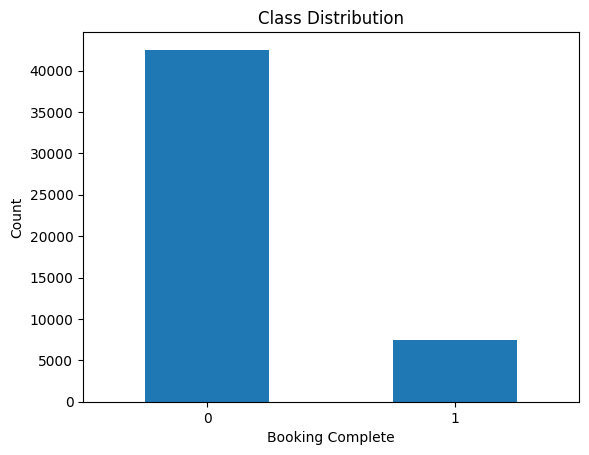

In [19]:
import matplotlib.pyplot as plt

df['booking_complete'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### Hyperparametered Decision Tree Classifier

In [33]:
def get_scores(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    score_1 = f1_score(val_y, preds_val, average='weighted')
    score_2 = accuracy_score(val_y, preds_val)
    return((score_1, score_2))

for max_leaf_nodes in [10, 100, 1000, 5000, 10000, 30000]:
    my_scores = get_scores(max_leaf_nodes, OH_X_train, OH_X_valid, y_train, y_valid)
    print("Max leaf nodes: %d  \t\t Scores:  %s" %(max_leaf_nodes, my_scores))

Max leaf nodes: 10  		 Scores:  (0.7755366684000693, 0.84608)
Max leaf nodes: 100  		 Scores:  (0.7833623892891978, 0.84432)
Max leaf nodes: 1000  		 Scores:  (0.8071268126508839, 0.83056)
Max leaf nodes: 5000  		 Scores:  (0.7977163830925628, 0.8024)
Max leaf nodes: 10000  		 Scores:  (0.7919808815028507, 0.79328)
Max leaf nodes: 30000  		 Scores:  (0.7919808815028507, 0.79328)


After hyperparameter tuning, the best accuracy is achieved when the max leaf nodes are 5 or 10. However, we will continue with F1 score since our class is imbalanced. The best F1 score is achieved when our max leaf nodes are 1000. And it is 81%.

In [21]:
model_results['HyperParameteredDecisionTreeClassifier'] = 0.8071268126508839

#### XGBoost

In [27]:
from xgboost import XGBClassifier

model_3 = XGBClassifier(n_estimators=1000, n_jobs=6)
model_3.fit(OH_X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(OH_X_valid, y_valid)], 
             verbose=False)

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=6,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
preds = model_3.predict(OH_X_valid)
score_1 = f1_score(y_valid, preds, average='weighted')
score_2 = accuracy_score(y_valid, preds)
print('F1 score:', score_1)
print('Accuracy score:', score_2)

F1 score: 0.7936493537032523
Accuracy score: 0.84864


XGBClassifier provided with 79% accuracy.

In [22]:
model_results['XGBoost'] = 0.7936493537032523

#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def get_scores_random(n_estimators, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    score_1 = f1_score(val_y, preds_val, average='weighted')
    score_2 = accuracy_score(val_y, preds_val)
    return((score_1, score_2))

for n_estimators in [10, 100, 1000, 5000, 10000]:
    my_scores = get_scores_random(n_estimators, OH_X_train, OH_X_valid, y_train, y_valid)
    print("Max leaf nodes: %d  \t\t Scores:  %s" %(n_estimators, my_scores))

Max leaf nodes: 10  		 Scores:  (0.8028580536828088, 0.84208)
Max leaf nodes: 100  		 Scores:  (0.8081378234009415, 0.8484)
Max leaf nodes: 1000  		 Scores:  (0.8079522564346394, 0.84744)
Max leaf nodes: 5000  		 Scores:  (0.8086487958747195, 0.84792)
Max leaf nodes: 10000  		 Scores:  (0.8090531474796374, 0.84784)


The best number of estimators is 10000 with F1 score of around 81%.

In [20]:
model_results['RandomForestClassifier'] = 0.8090531474796374

#### K Neighbor Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

k = 3 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(OH_X_train, y_train)
y_pred = knn_classifier.predict(OH_X_valid)

score_1 = f1_score(y_valid, preds, average='weighted')
score_2 = accuracy_score(y_valid, preds)
print('F1 score:', score_1)
print('Accuracy score:', score_2)

F1 score: 0.7888803019084136
Accuracy score: 0.78872


The F1 score of K Neighbors Classifier is around 79%.

In [25]:
model_results['KNeighborsClassifier'] = 0.7888803019084136

In [26]:
max_key = max(model_results, key=model_results.get)

In [27]:
print(max_key)

RandomForestClassifier


Best result is achieved with RandomForestClassifier.